# Exploratory Data Analysis of StackOverFlow Survery on Salaries of Various Coding Background Professions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import altair as alt
from sklearn.model_selection import train_test_split

alt.data_transformers.enable('data_server')
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

### Functions used

In [2]:
# Returns True if 'data' in a string , else returns False
def data_in_text(x):
    if type(x) is str:
        return 'data' in x
    else:
        return False
    
    
# Returns float values for different string inputs
def convert2float(x):
    if  x == 'More than 50 years' :
        return float(50)
    elif x == 'Less than 1 year':
        return float(0)
    else:
        return float(x)
    
    



# Summary of the dataset

---
The goal of the project is to create a machine learning model by busing the job related information from the collected dataset, to predict the target `ConvertedCompYearly`, which is the converted yearly compensation for the Data scientist/analysis related jobs in the US and Canada.<br>
The final model will be a regression model as the target will be a continuous variable.

In [3]:
survey_df = pd.read_csv("data/survey_results_public.csv")

In [4]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize                         

As we can see there are 79 columns and 73268 rows.

In [5]:
survey_df['Country'].value_counts()[:10].to_frame().style.set_caption('Table 1. Counts of observation for top ten countries')

,Country
United States of America,13543
India,6639
Germany,5395
United Kingdom of Great Britain and Northern Ireland,4190
Canada,2490
France,2328
Brazil,2109
Poland,1732
Netherlands,1555
Spain,1521


Since we want to focus on the data points for US and Canada, data scientist/analysis related jobs, we filter the dataset by <code>United States of America</code> and <code>Canada</code>.



In [6]:
north_america_data = survey_df.query("Country == 'United States of America' or Country == 'Canada'")

In [7]:
north_america_data.shape


(16033, 79)

Since we don't need all the features from the dataset, thus we will only keep the remaining ones for the prediction purpose:
- MainBranch
- Employment
- RemoteWork
- EdLevel
- YearCode
- YearCodePro
- DevType
- OrgSize
- Country
- LanguageHaveWorkedWith
- DatabaseHaveWorkedWith
- PlatformHaveWorkedWith
- WebframeHaveWorkedWith
- MiscTechHaveWorkedWith
- ToolTechHaveWorkedWith
- NEWCollabToolsHaveWorkedWith
- OpSysProfessional use
- VersionControlSystem
- VCInteraction
- OfficeStackAsyncHaveWorkedWith
- Age
- WorkExp
- Icorpm



In [8]:
cols_to_choose = ['MainBranch',
'Employment',
'RemoteWork',
'EdLevel',
'YearsCode',
'YearsCodePro',
'DevType',
'OrgSize',
'Country',
'LanguageHaveWorkedWith',
'DatabaseHaveWorkedWith',
'PlatformHaveWorkedWith',
'WebframeHaveWorkedWith',
'MiscTechHaveWorkedWith',
'ToolsTechHaveWorkedWith',
'NEWCollabToolsHaveWorkedWith',
'OpSysProfessional use',
'VersionControlSystem',
'VCInteraction',
'OfficeStackAsyncHaveWorkedWith',
'Age',
'WorkExp',
'ICorPM',
'ConvertedCompYearly']

In [9]:
north_america_data = north_america_data[cols_to_choose]

In [10]:
multianswerq_cols = [
'DevType',
'LanguageHaveWorkedWith',
'DatabaseHaveWorkedWith',
'PlatformHaveWorkedWith',
'WebframeHaveWorkedWith',
'MiscTechHaveWorkedWith',
'ToolsTechHaveWorkedWith',
'NEWCollabToolsHaveWorkedWith',
'OpSysProfessional use',
'VCInteraction',
'VersionControlSystem',
'OfficeStackAsyncHaveWorkedWith',
'Employment']

# Split data set into training and test splits
---

In [11]:
train_df, test_df = train_test_split(north_america_data, test_size=0.2, random_state=123)


train_df = train_df.dropna(subset=['ConvertedCompYearly'])

## Data Wranging 
---

In [12]:
train_df['YearsCode'] = train_df['YearsCode'].apply(lambda x: convert2float(x))

train_df['YearsCodePro'] = train_df['YearsCodePro'].apply(lambda x: convert2float(x))

# EDA on the Training Dataset

--- 


## Coding for all the charts

In [13]:
converted_comp_hist = alt.Chart(train_df).mark_bar().encode(
    x=alt.X('ConvertedCompYearly', bin=alt.Bin(maxbins=30)),
    y='count()'
)

years_code = alt.Chart(train_df).mark_rect().encode(
    alt.X('YearsCode', bin=alt.Bin(maxbins=40)),
    alt.Y('ConvertedCompYearly', bin=alt.Bin(maxbins=40)),
    alt.Color('count()'))

years_code_pro = alt.Chart(train_df).mark_rect().encode(
    alt.X('YearsCodePro', bin=alt.Bin(maxbins=40)),
    alt.Y('ConvertedCompYearly', bin=alt.Bin(maxbins=40)),
    alt.Color('count()')
)


work_exp = alt.Chart(train_df).mark_rect().encode(
    alt.X('WorkExp', bin=alt.Bin(maxbins=40)),
    alt.Y('ConvertedCompYearly', bin=alt.Bin(maxbins=40)),
    alt.Color('count()'))

columns = ['Country', 'ICorPM', 'RemoteWork', 'OrgSize', 'EdLevel']

multi_bar_plot = alt.Chart(train_df).mark_bar().encode(
    y=alt.Y(alt.repeat(), sort='x'),
    x='median(ConvertedCompYearly)'
).repeat(columns, columns=2)

corr_table = train_df.corr().style.background_gradient().set_caption('Table 2. Correlation Plot between numeric data')


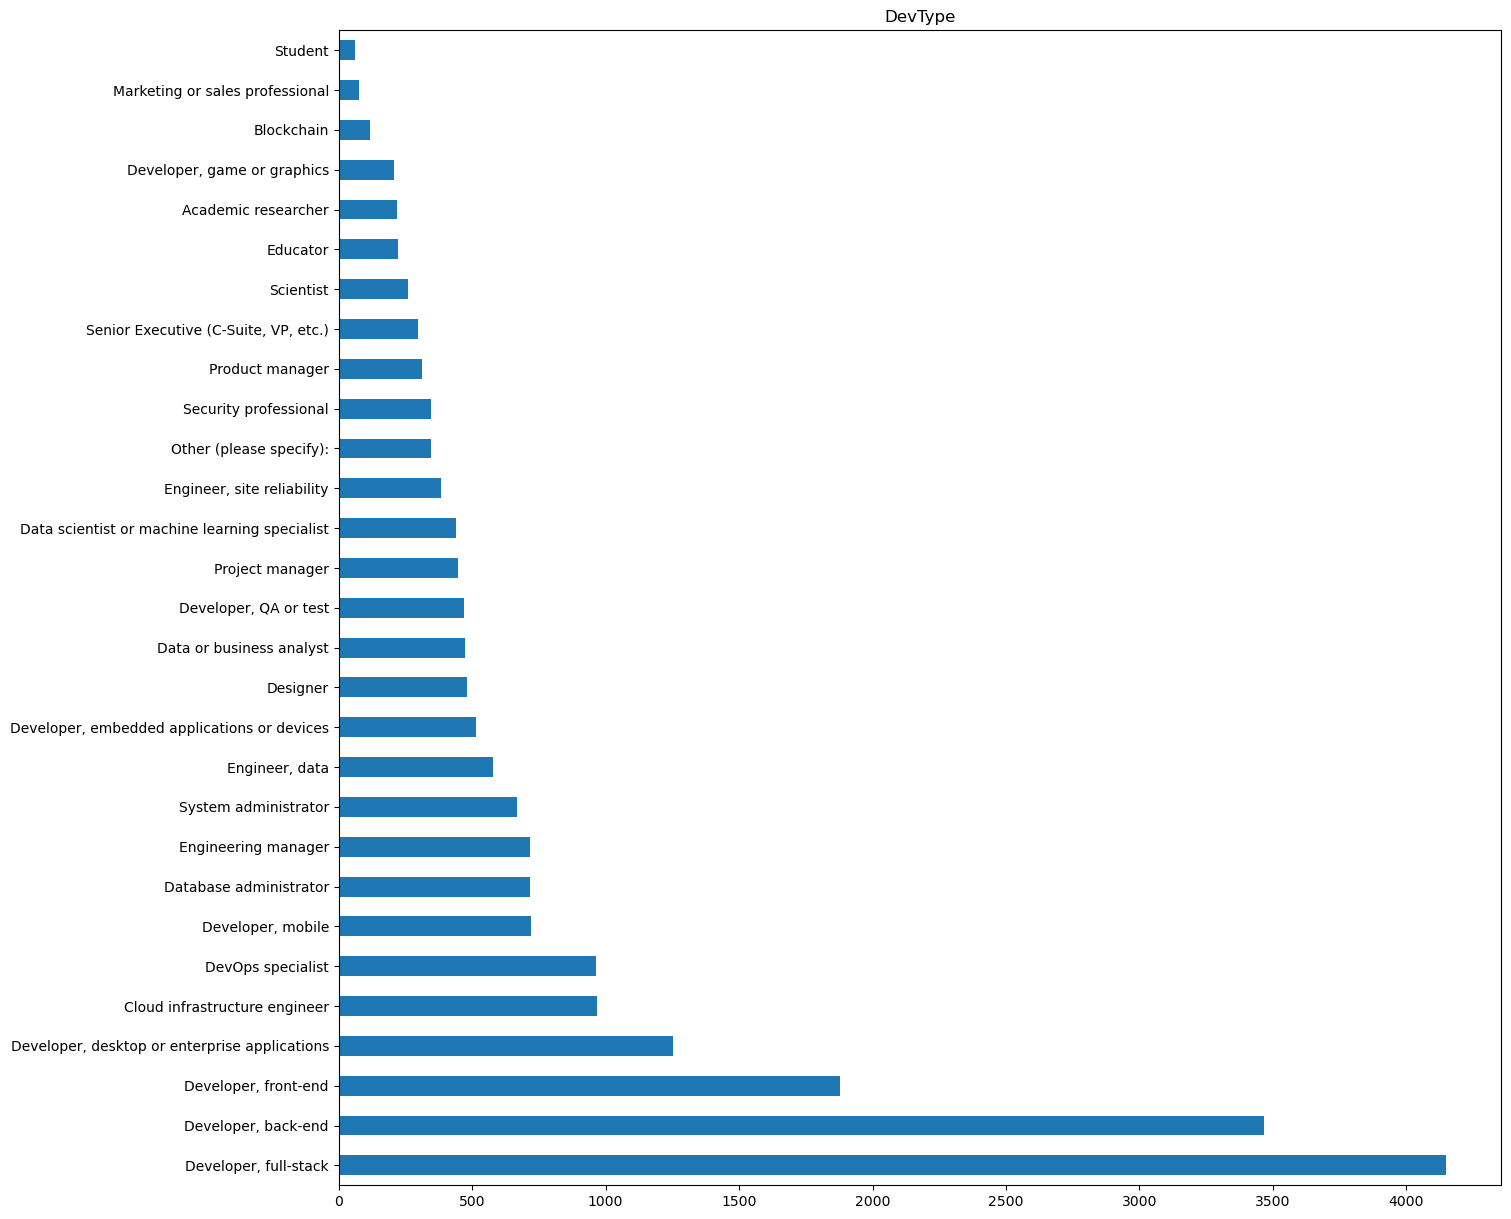

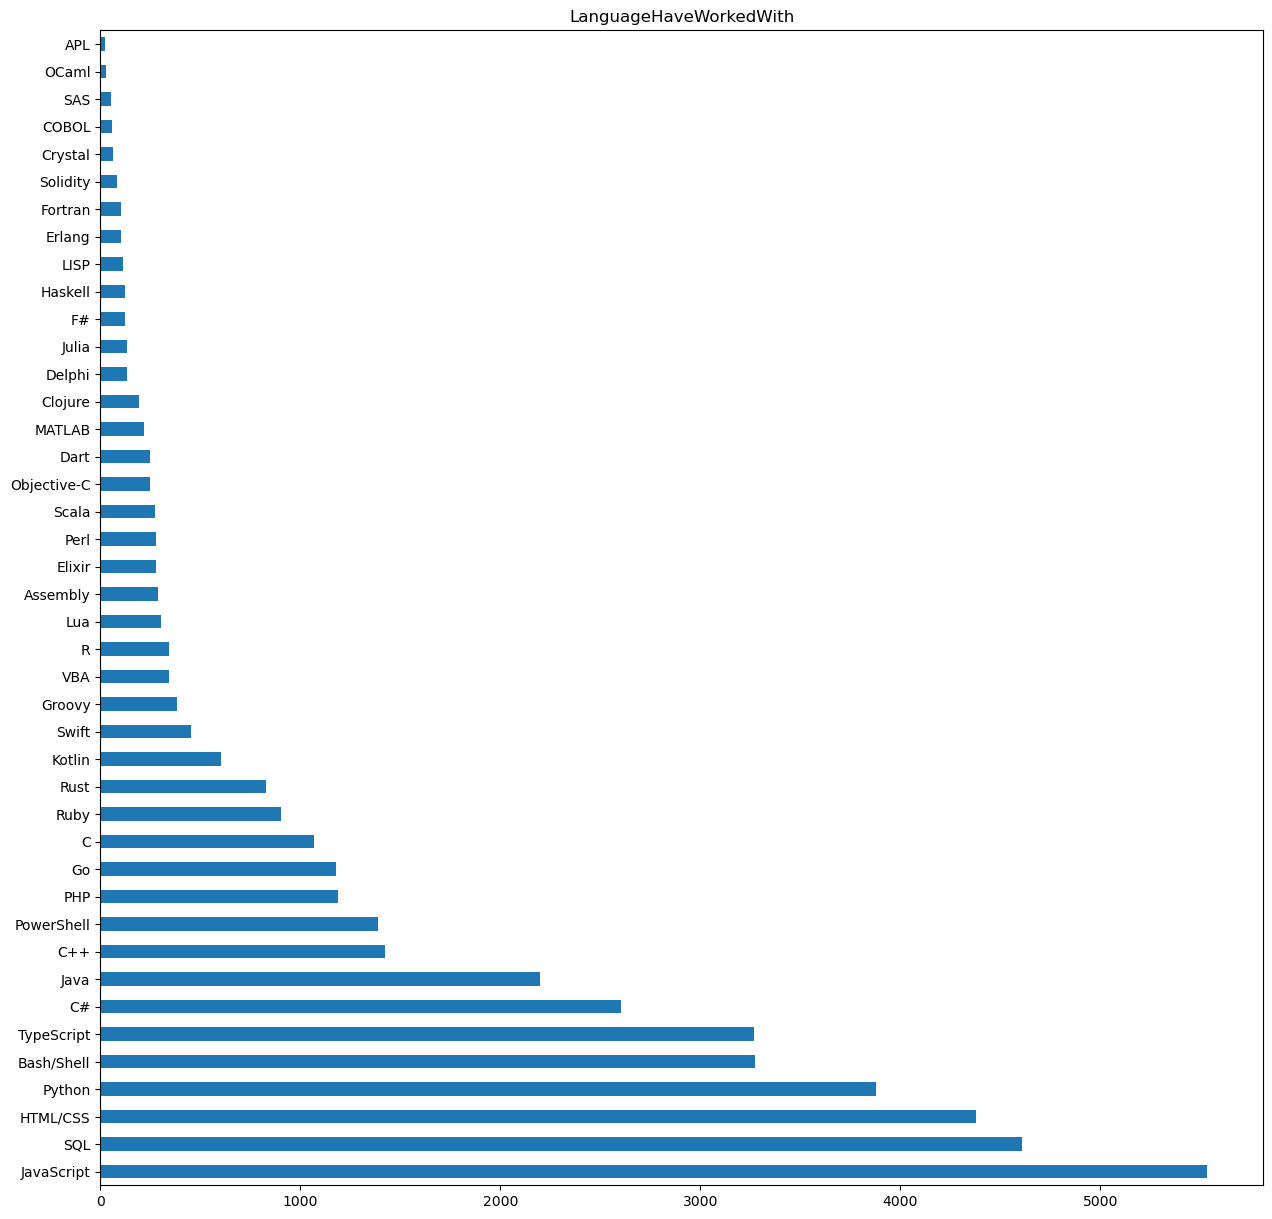

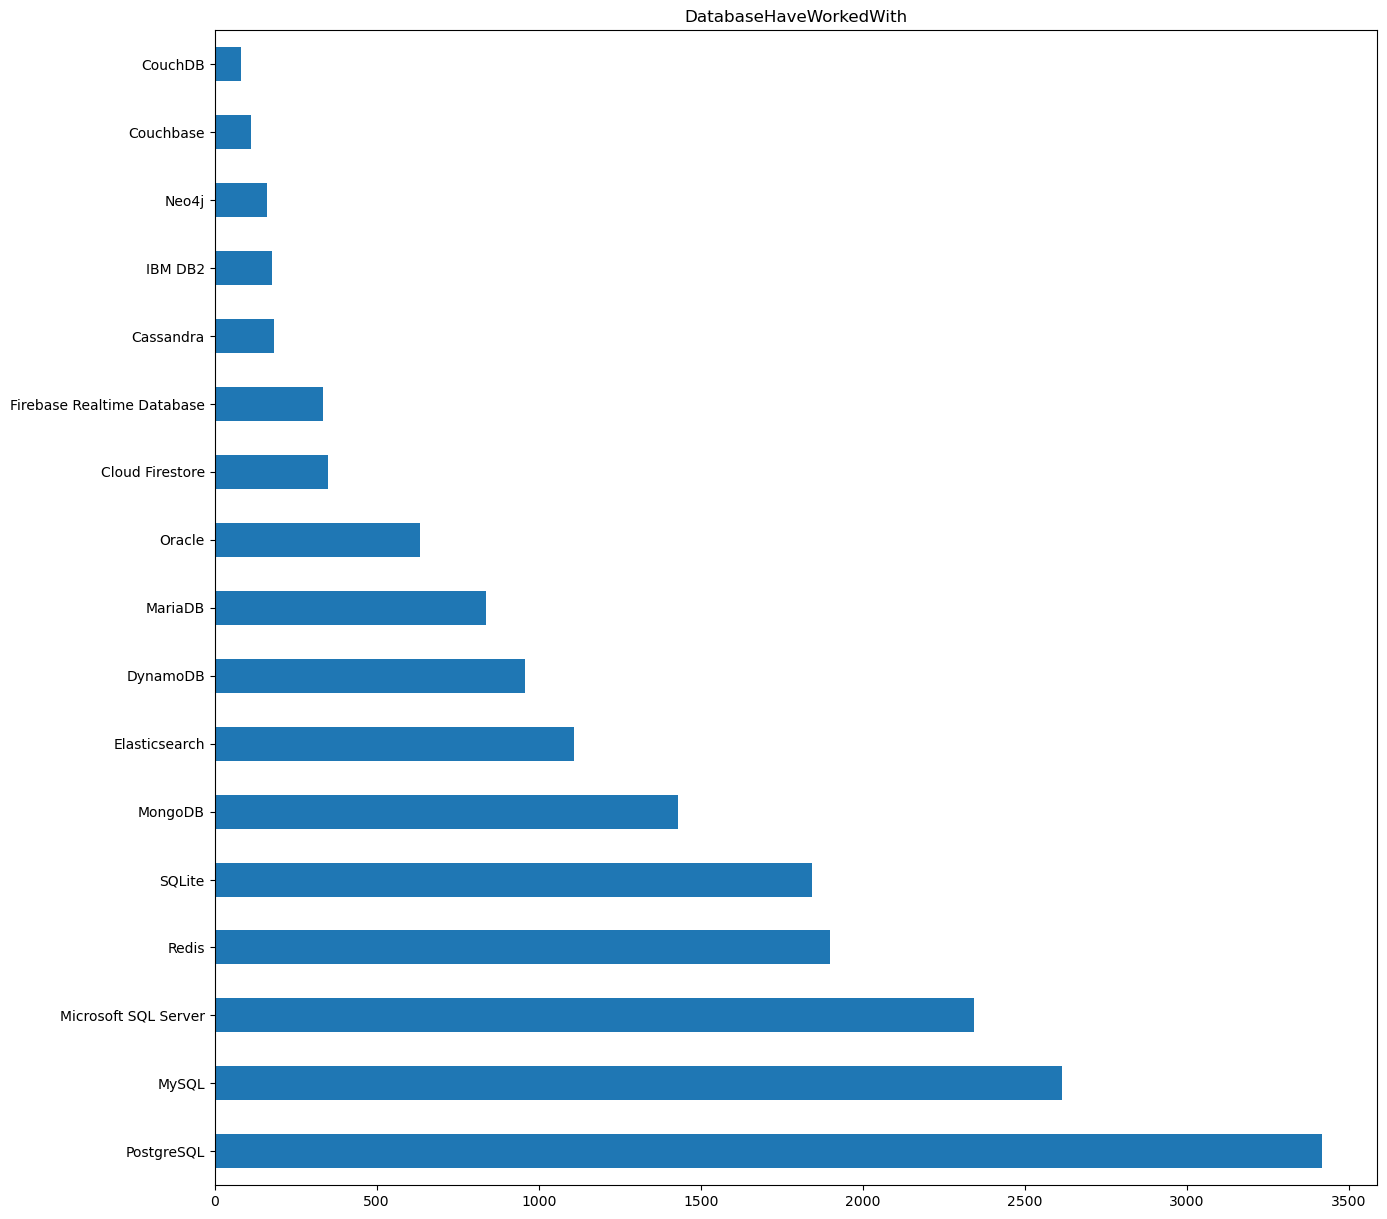

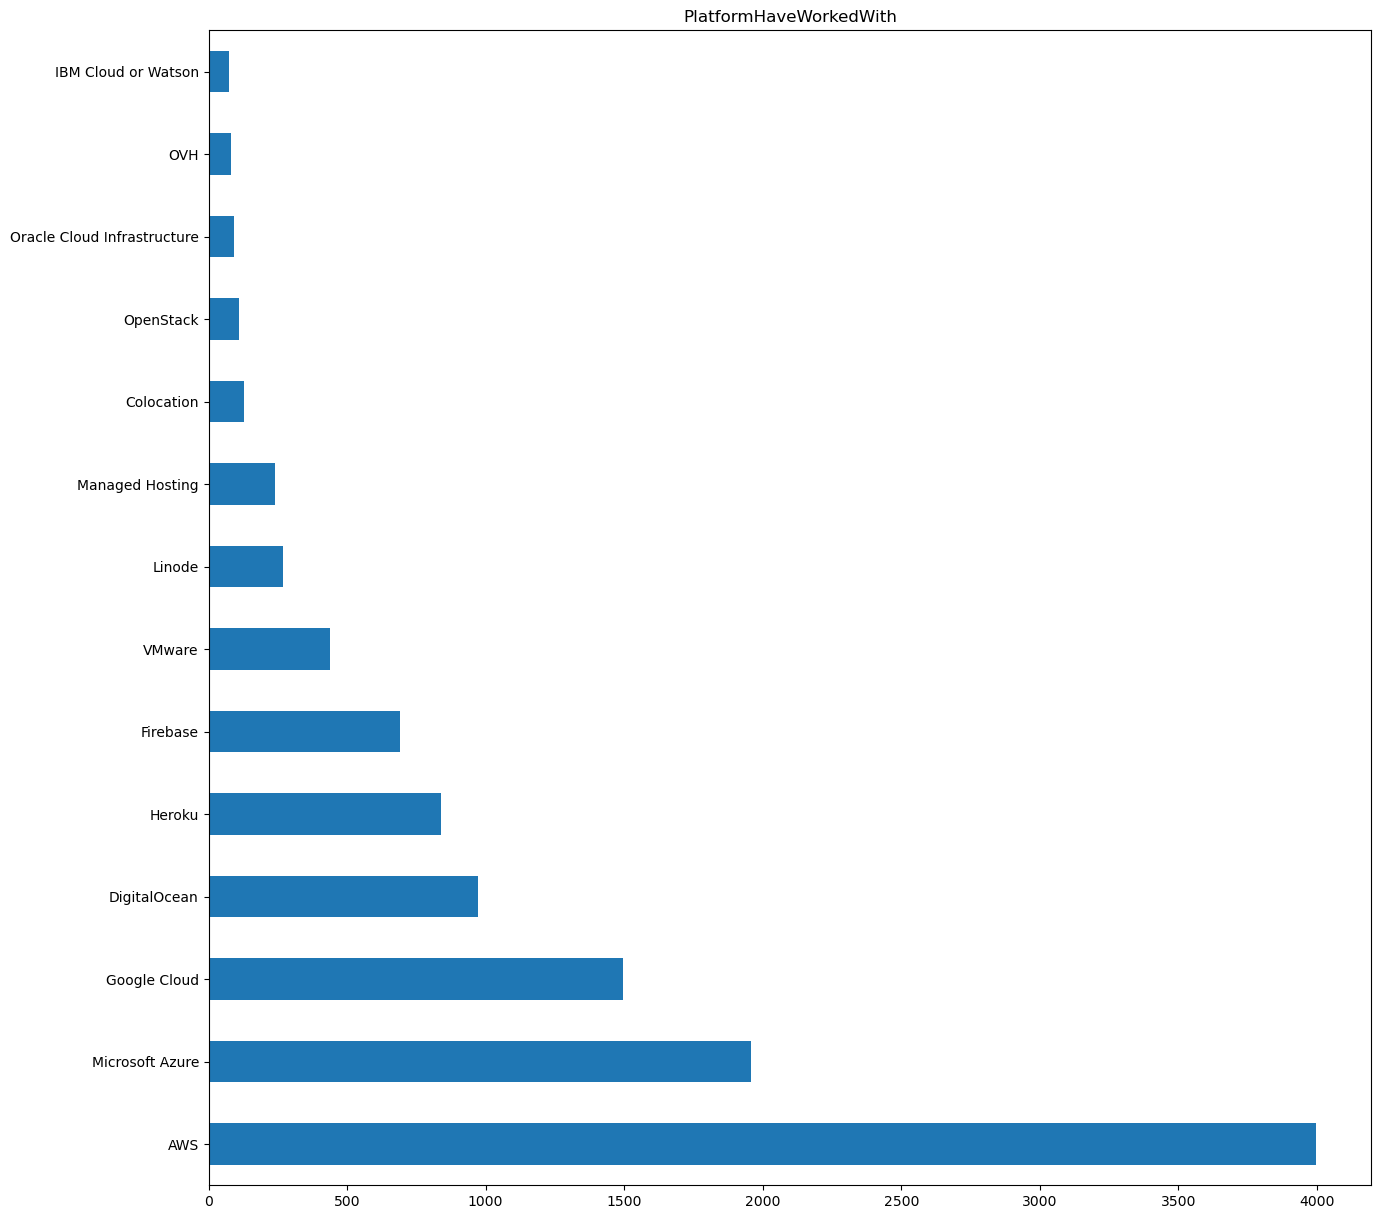

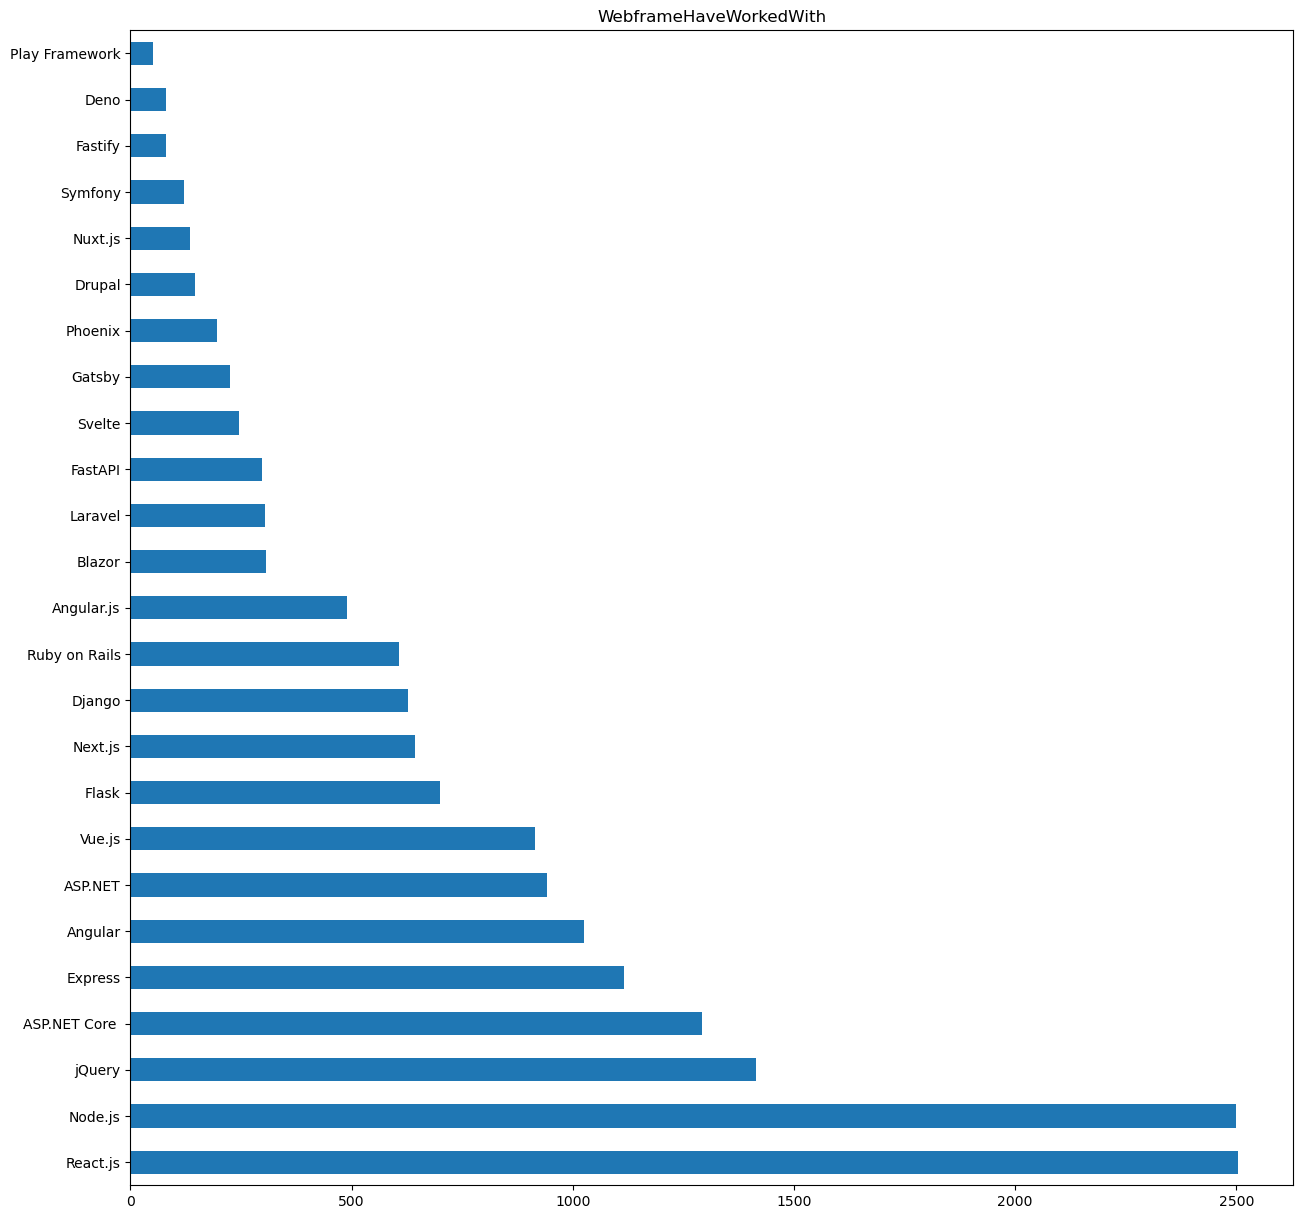

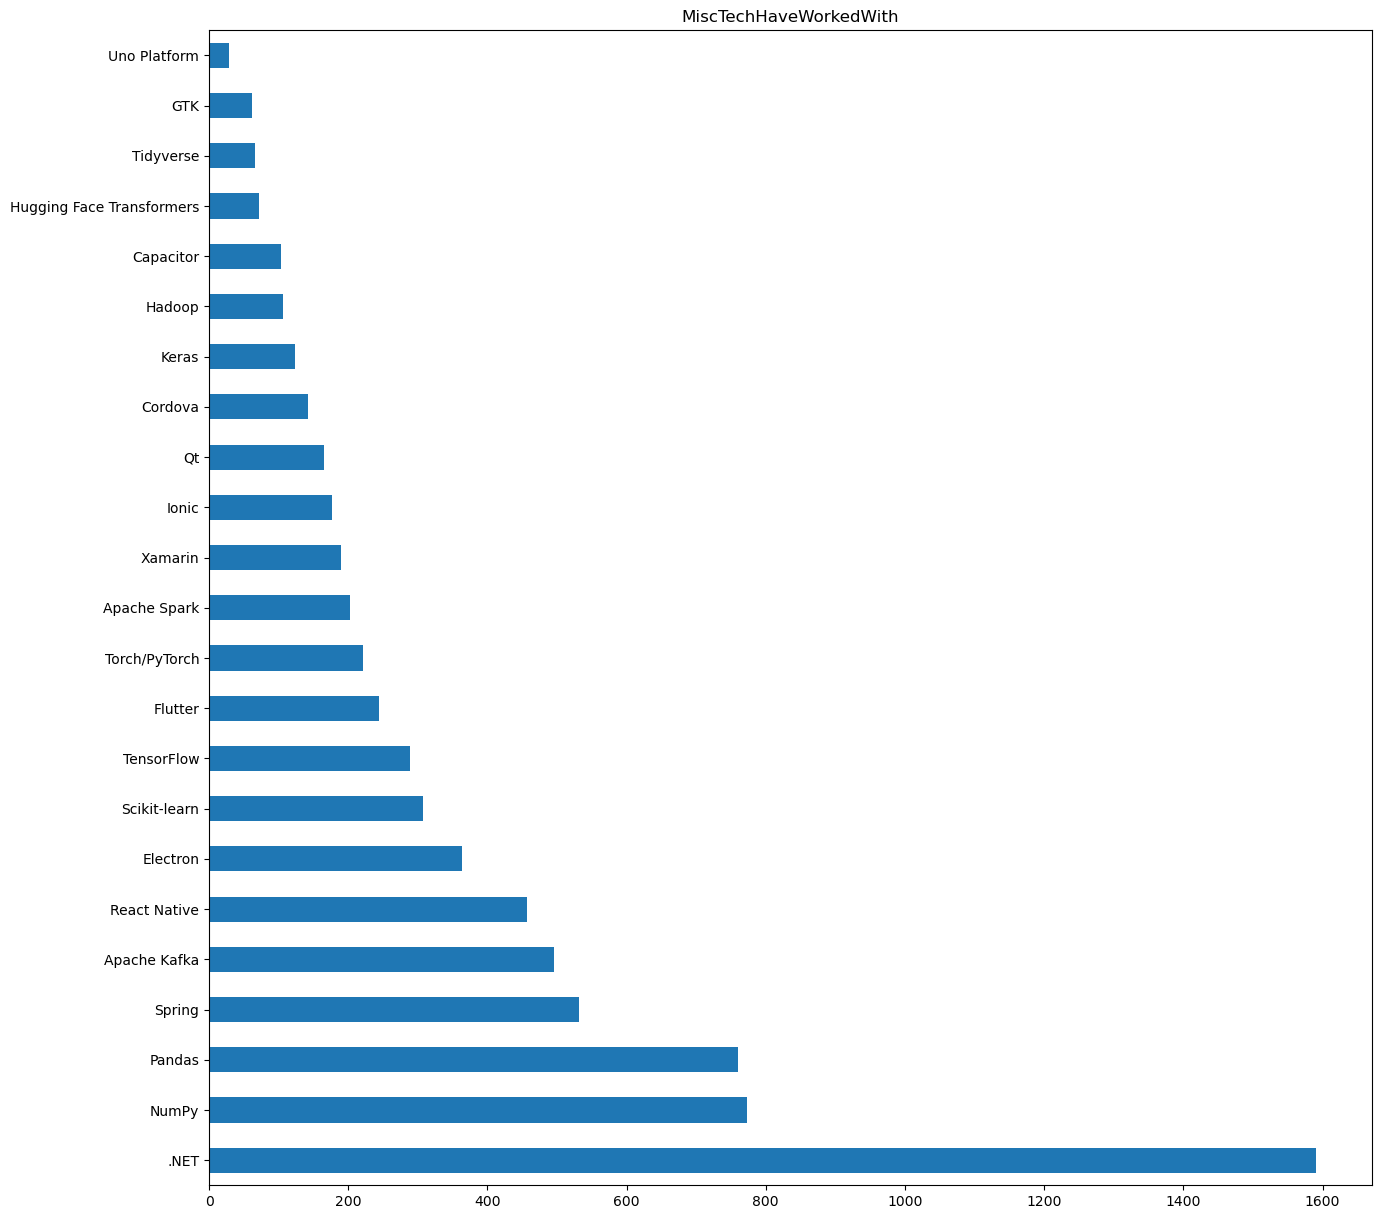

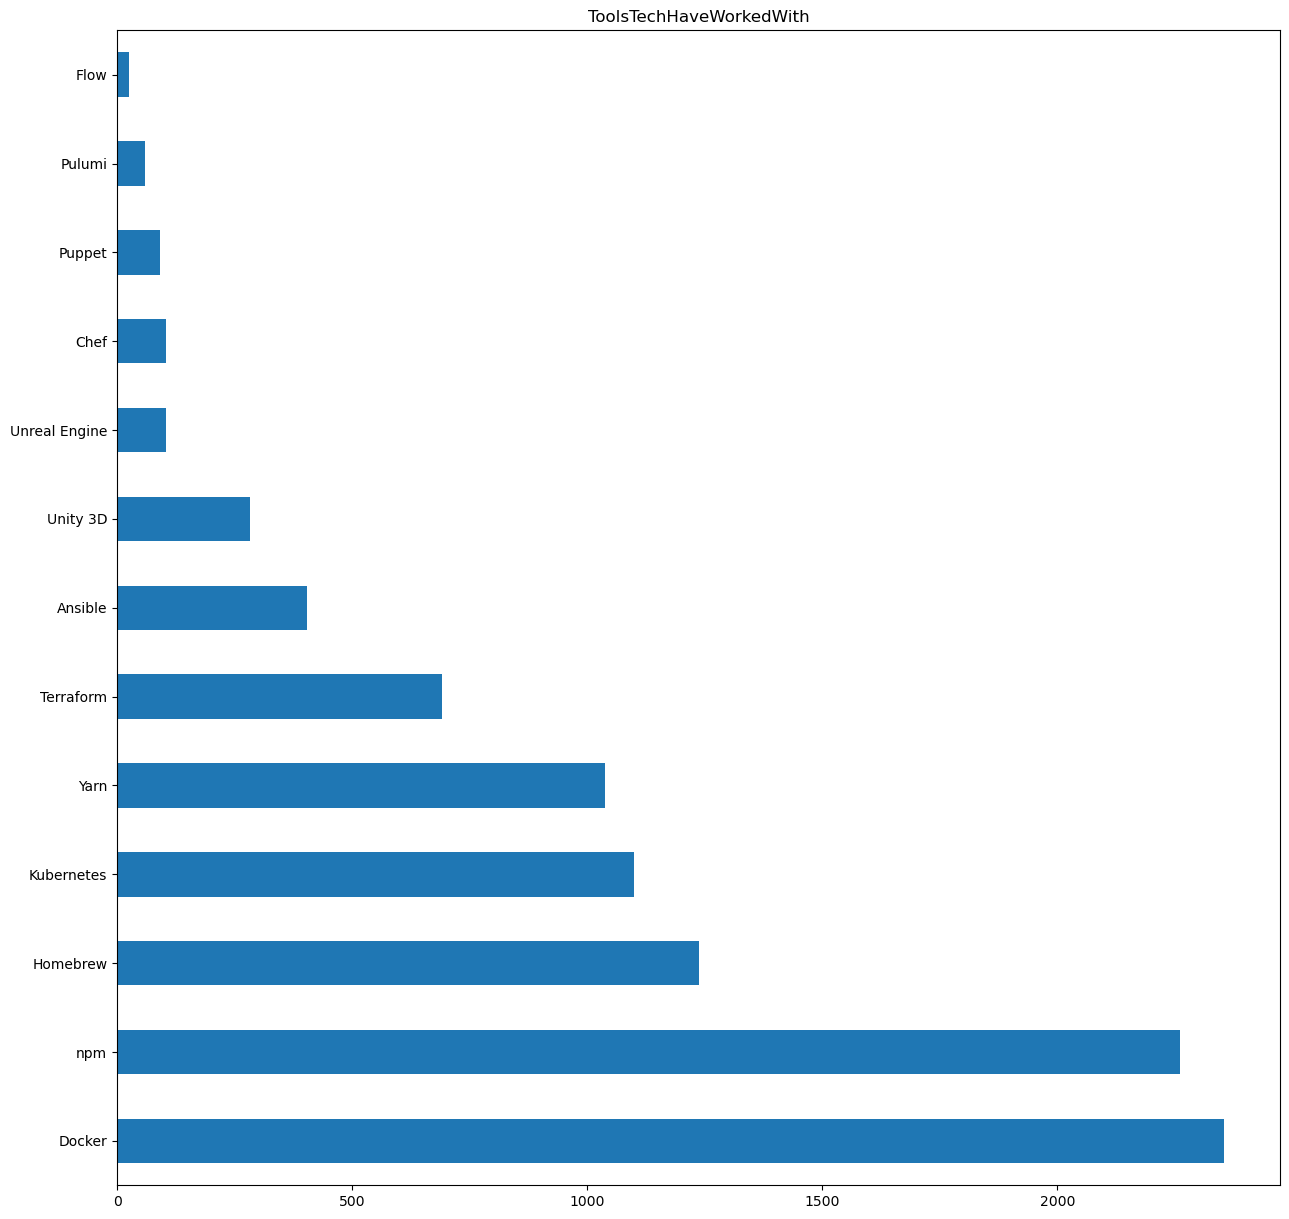

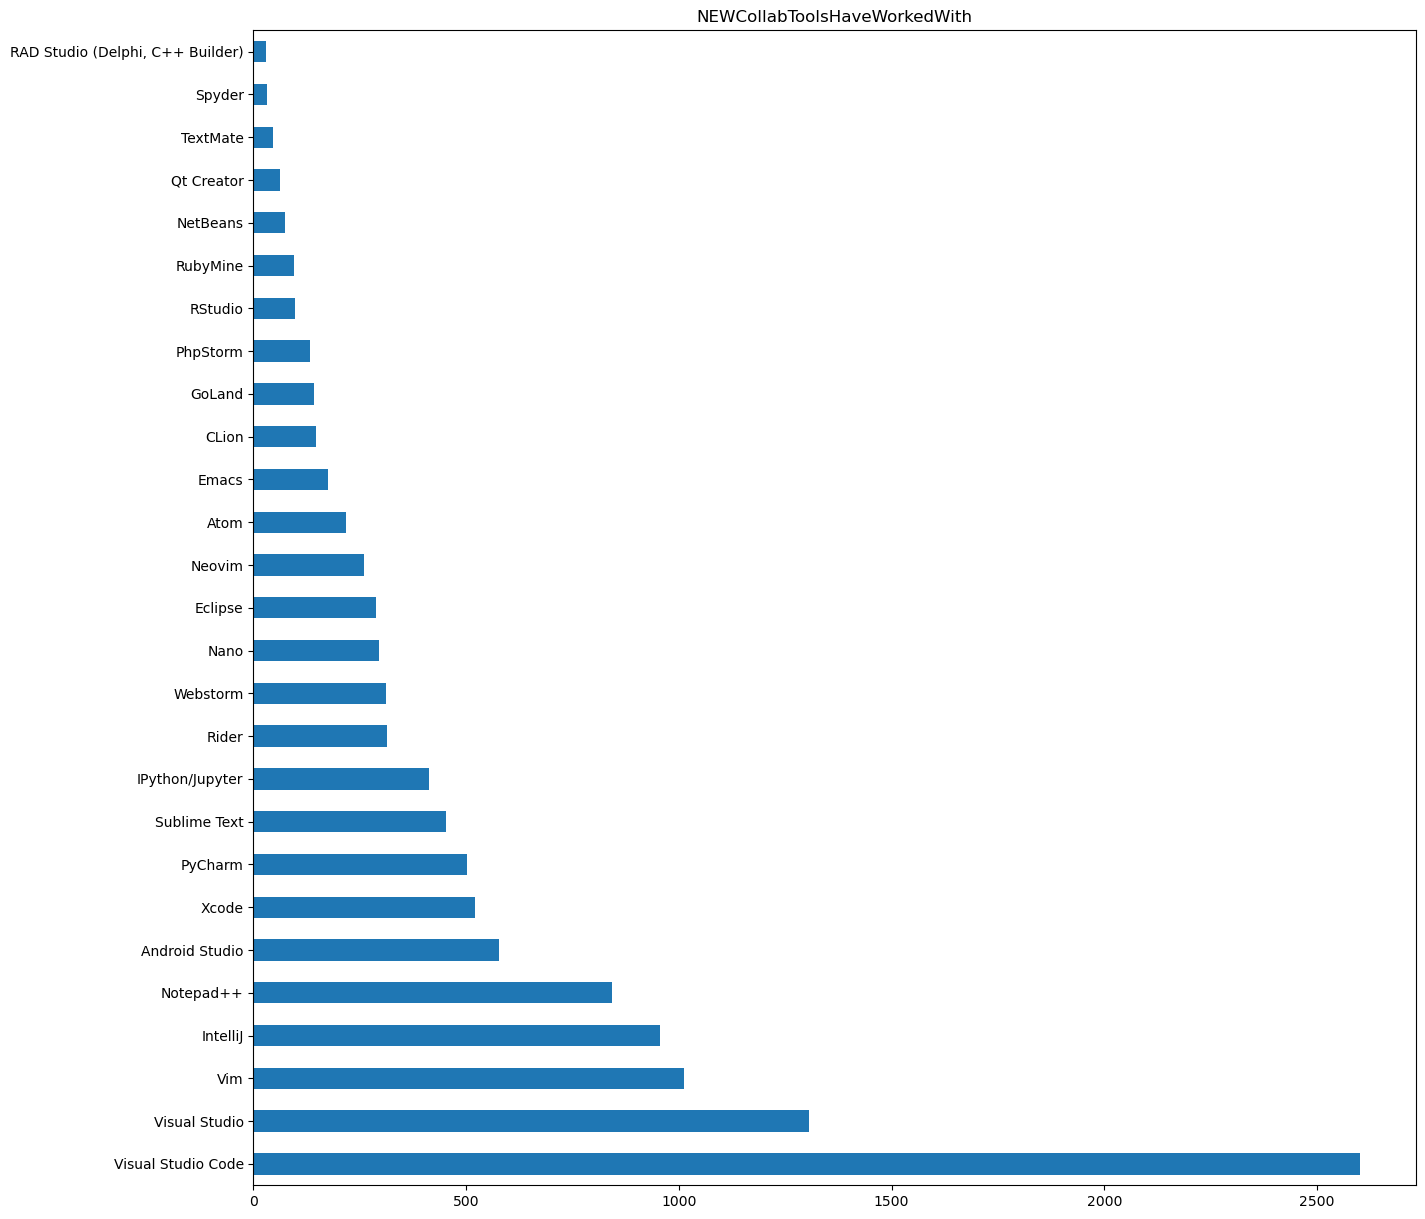

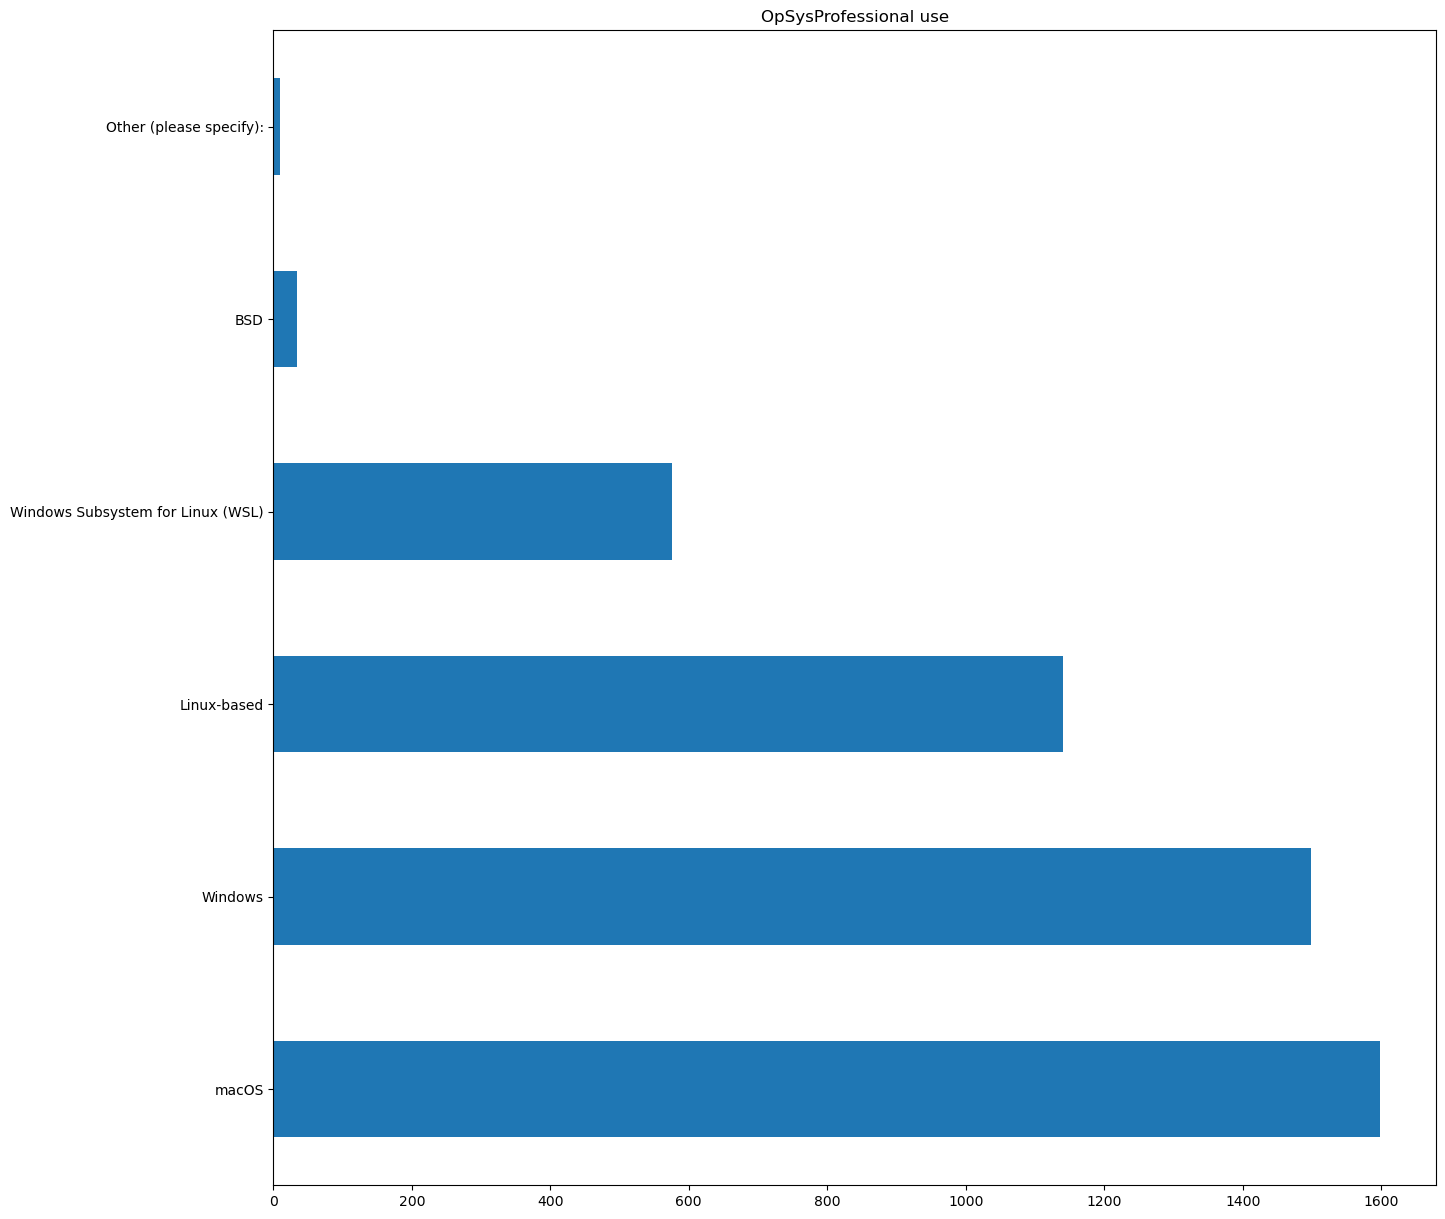

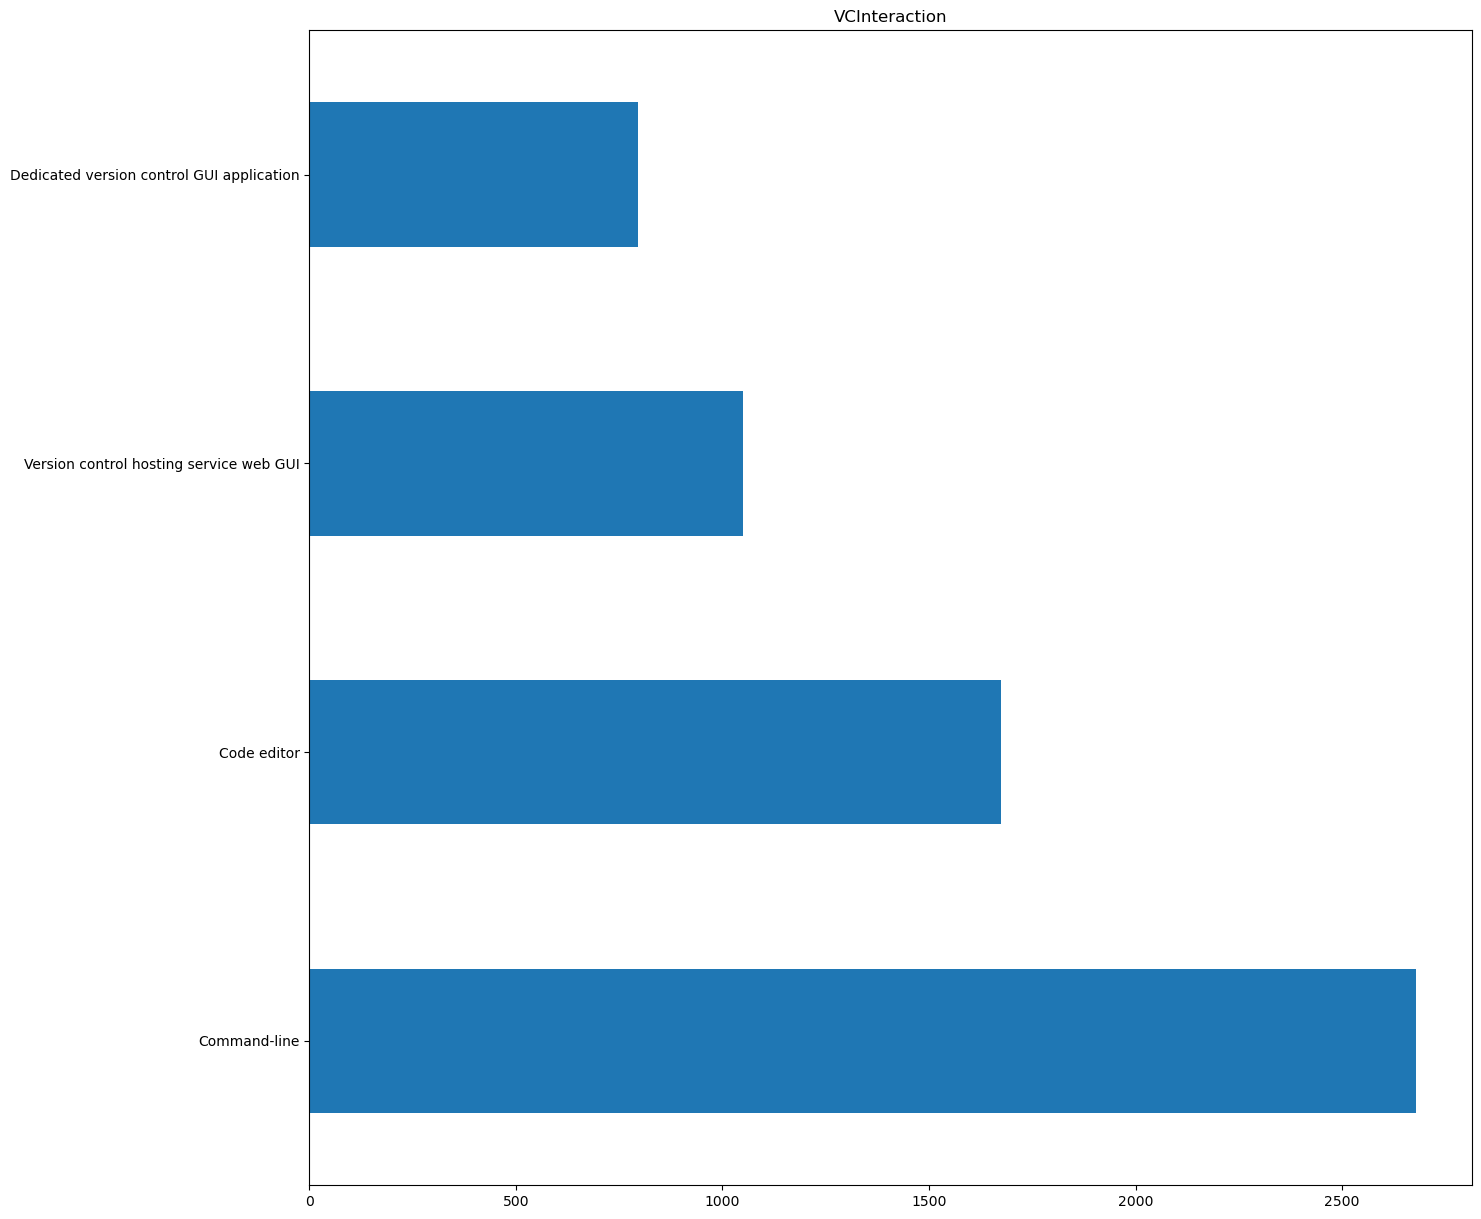

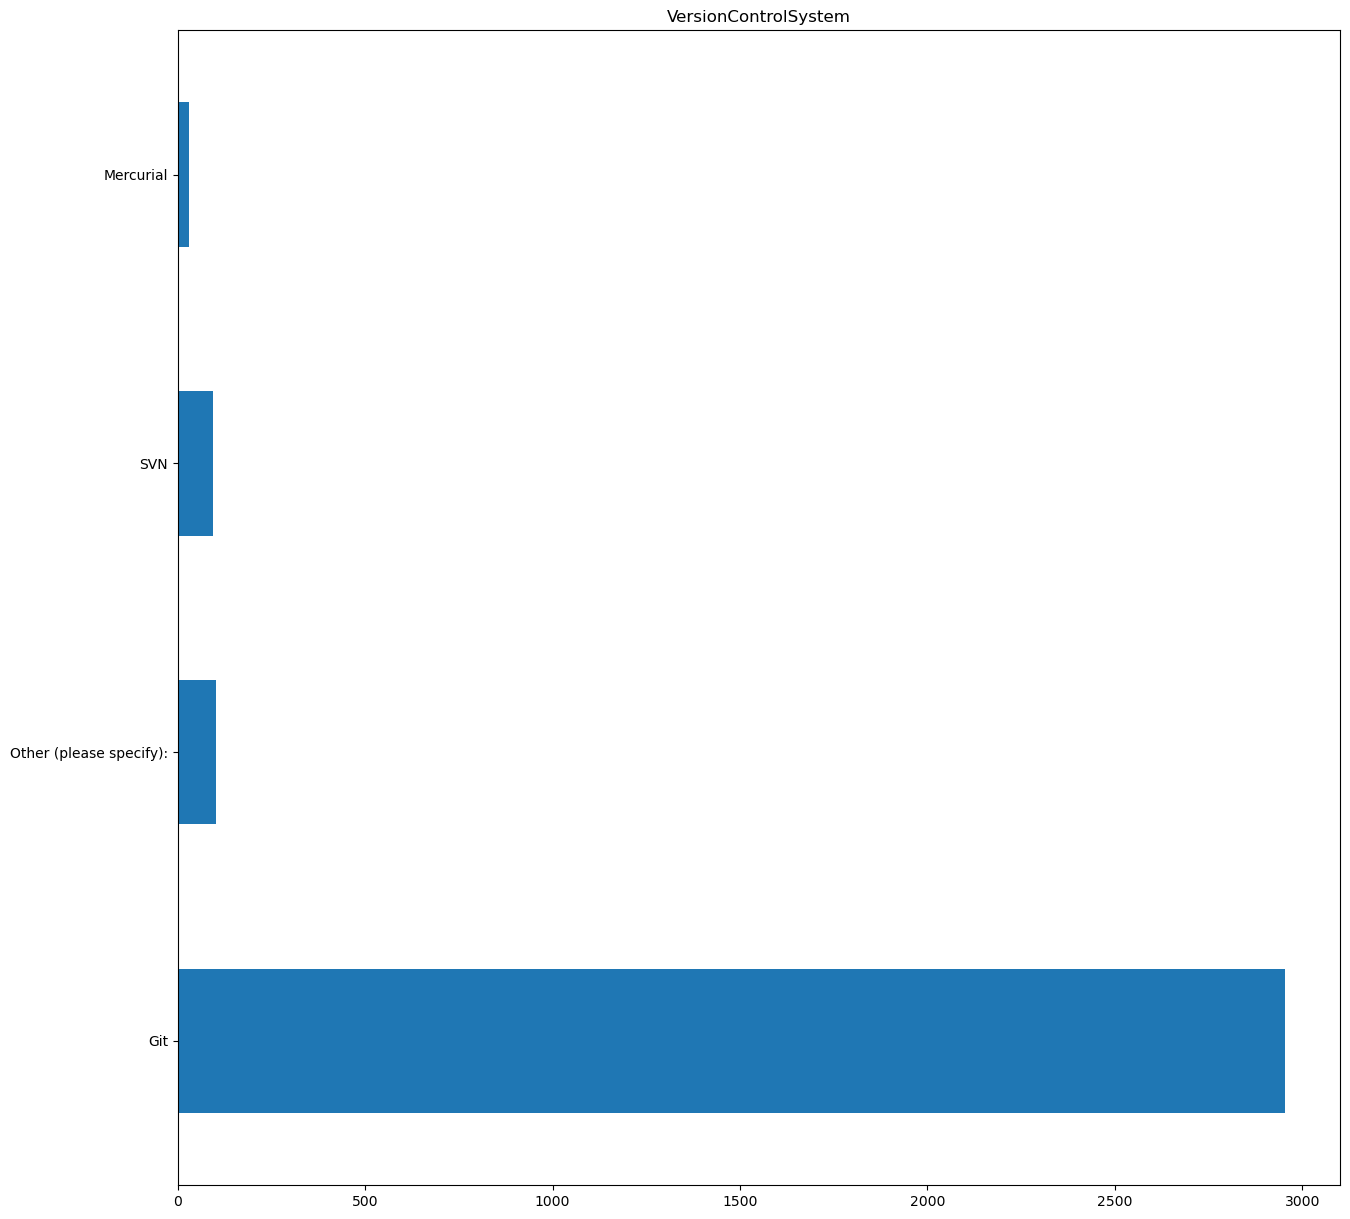

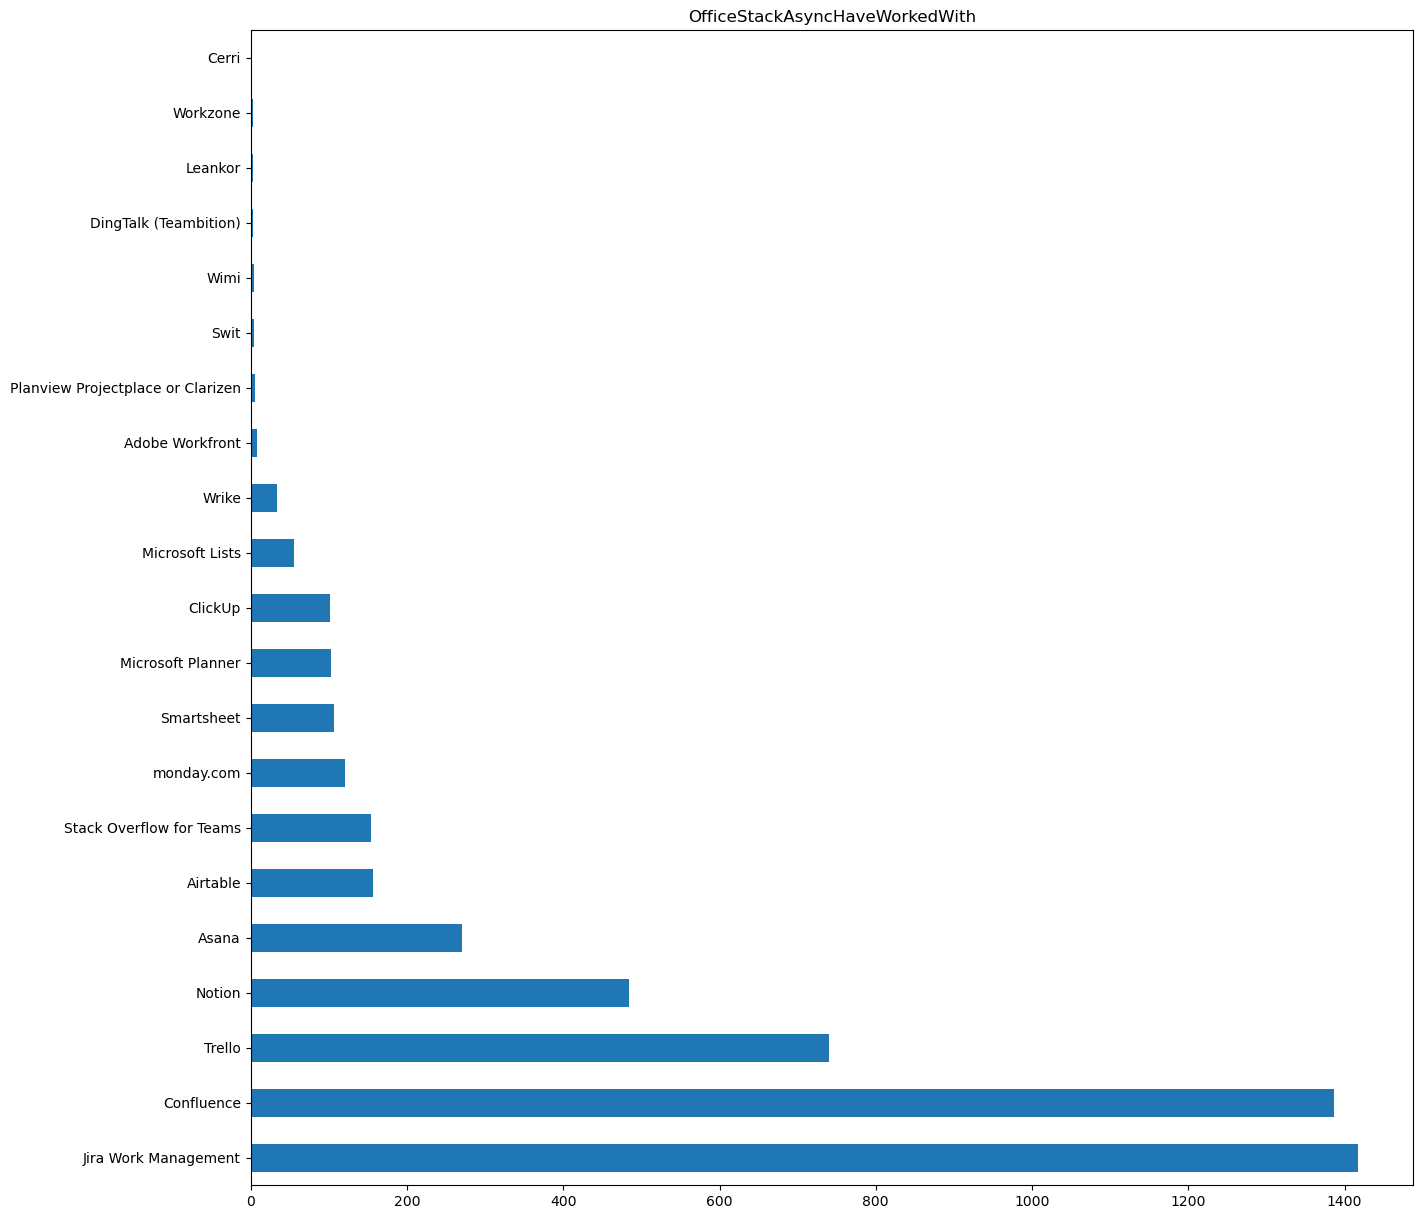

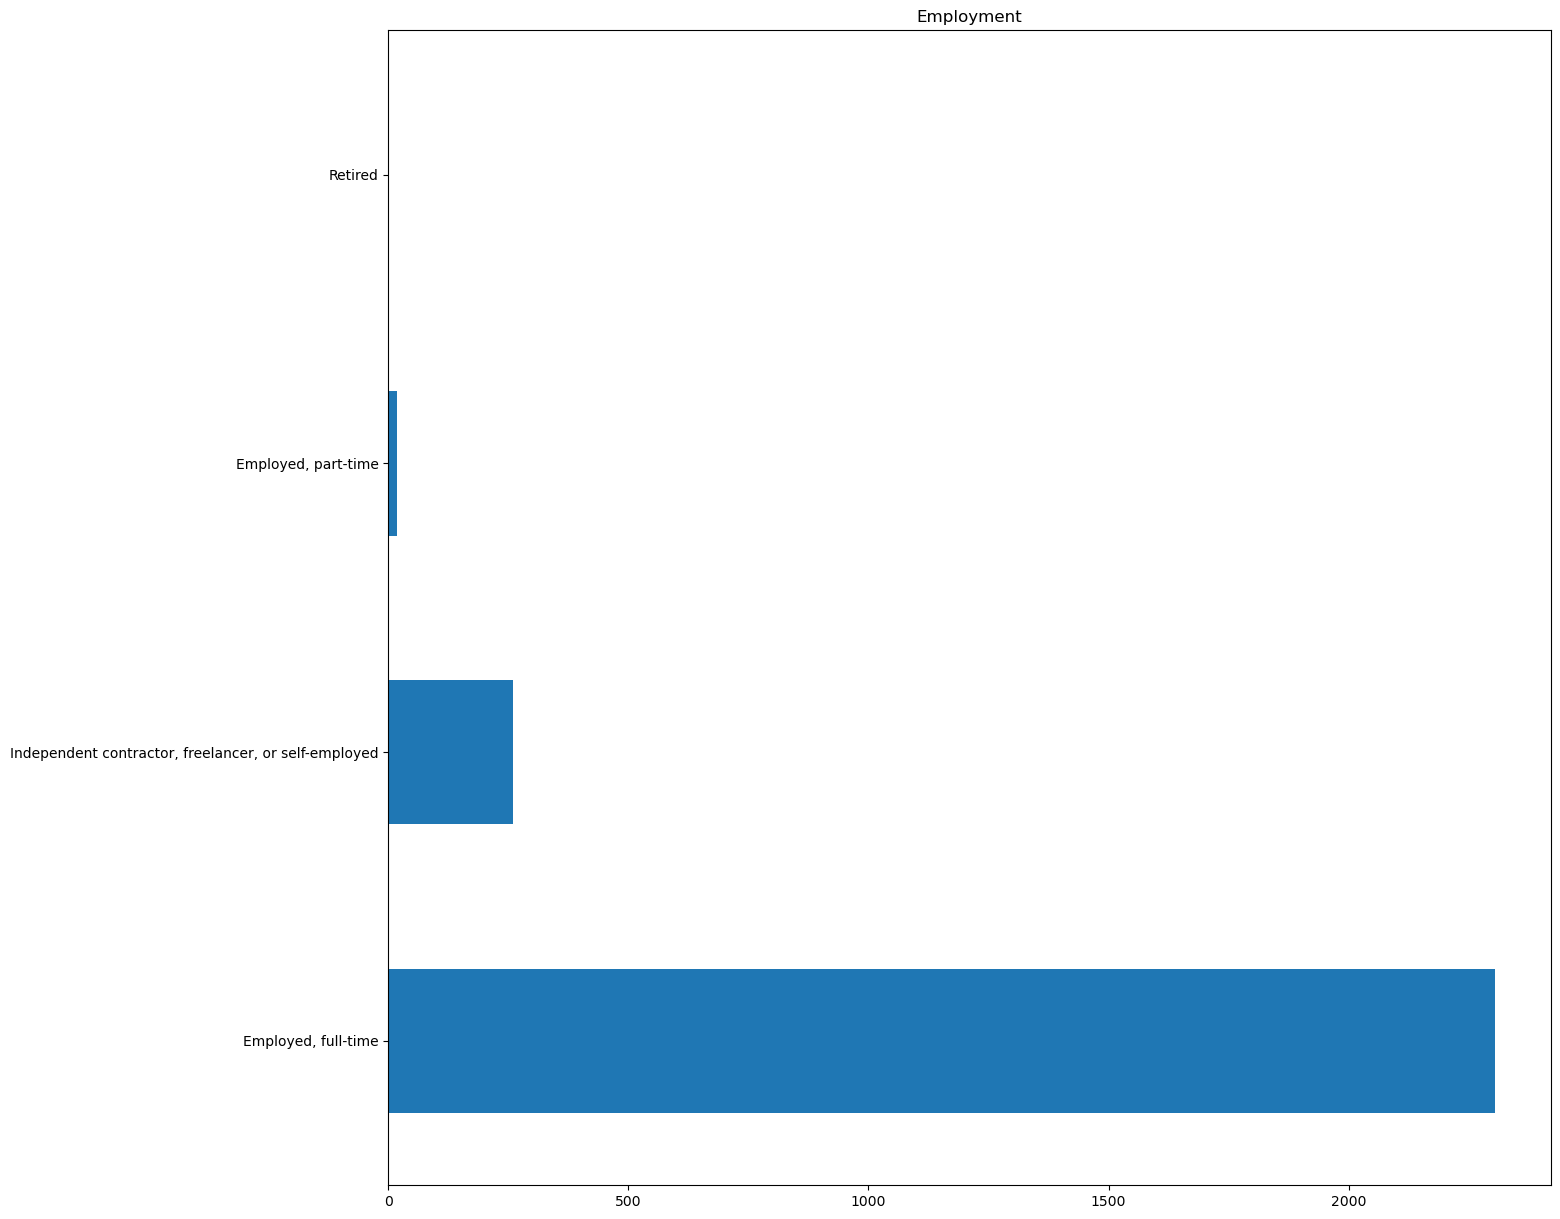

In [14]:
# only for plotting
plotting_dataset  = train_df.copy()
for col in multianswerq_cols:
    plotting_dataset = plotting_dataset.dropna(subset=[col])
    plotting_dataset[col] = plotting_dataset[col].apply(lambda x: x.split(';'))
    boom_data = plotting_dataset.explode(col)
    boom_data[col].value_counts().plot.barh(title = col, figsize  = [15, 15])
    plt.show()
    

    

Taking the look at the distribution in our plots, all these features can be used in our model by one hot encoding them. There are a lot of missing values, we will try various imputation techniques to deal with this issue. For class imbalance issues, we will try to club classes having very few counts or make use undersampling/oversampling techniques

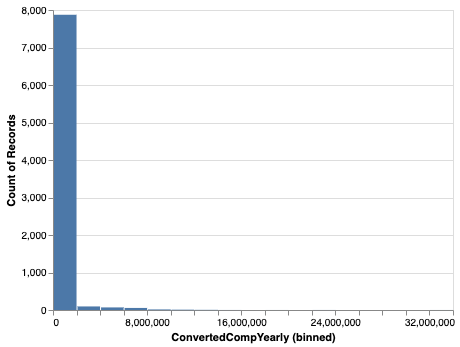

In [15]:
converted_comp_hist

This shows that the salary data is highly skewed therefore it is better if we take median as a measure since it is better against the outliers

<b>2D Histogram for YearsCode and ConvertedCompYearly</b>

There appear to be very less outliers in the above chart and also most of the data lies between 6-12 years 

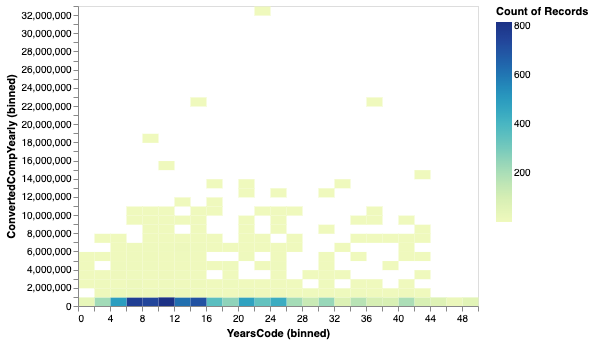

In [16]:
years_code

<b>2D Histogram for YearsCodePro and ConvertedCompYearly </b>

There appear to be very less outliers in the above chart and also most of the data lies between 2-8 years 

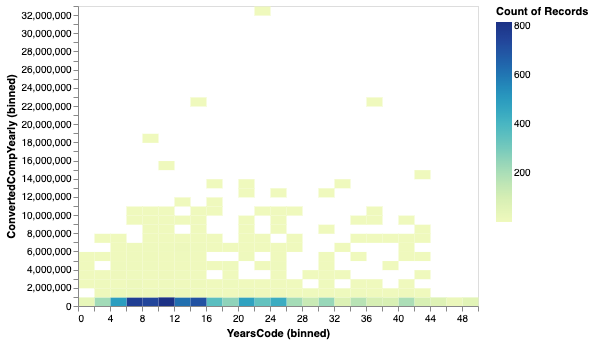

In [17]:
years_code

<b>2D Histogram for WorkExp and ConvertedCompYearly </b>

There appear to be barely any outliers in the above chart and also most of the data lies between 2-6 years 

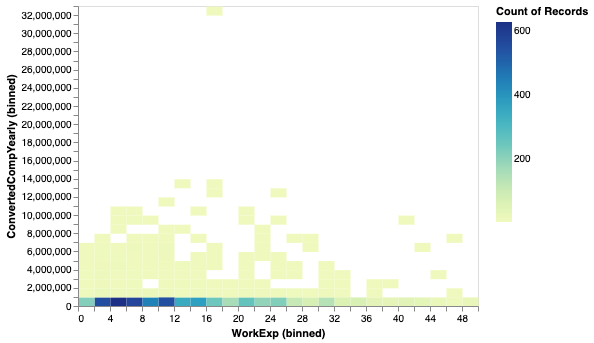

In [18]:
work_exp

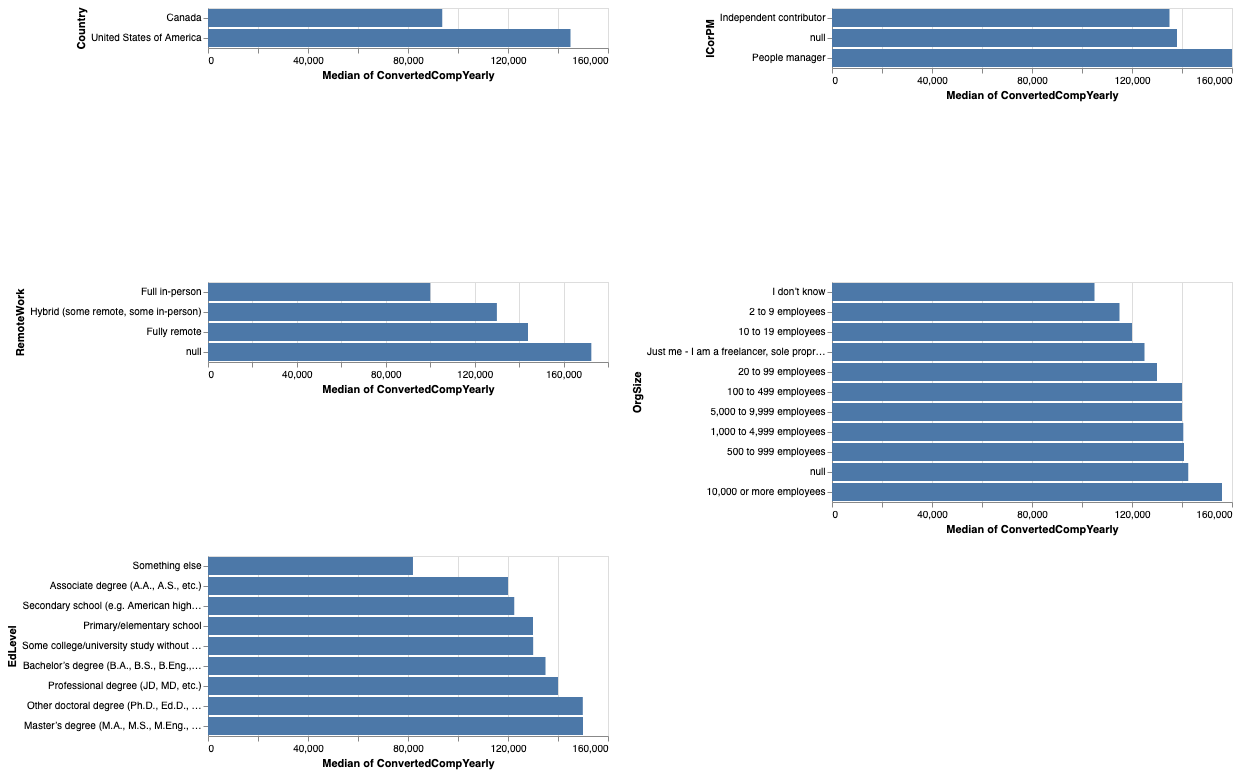

In [19]:
multi_bar_plot

1. The bar chart for Country and ConvertedCompYearly shows that median salary for US is about 130K and 95K for Canada
2. The bar chart for ICorPM and ConvertedCompYearly shows that highest median salary are for people manager
3. The bar chart for RemoteWork and ConvertedCompYearly shows that median salary for is highest for those working fully remote
4. The bar chart for Orgsize and ConvertedCompYearly shows that median salary is highest for companies having 10,000 employees or more
5. The bar chart for Edlevel and ConvertedCompYearly shows that highest median salary are having a masters degree

Overall here there is less class imbalance for these features

In [20]:
corr_table

,YearsCode,YearsCodePro,WorkExp,ConvertedCompYearly
YearsCode,1.000000,0.915677,0.844152,0.018527
YearsCodePro,0.915677,1.000000,0.902687,0.019431
WorkExp,0.844152,0.902687,1.000000,0.007428
ConvertedCompYearly,0.018527,0.019431,0.007428,1.000000


It is seen that there is very high correlation between the three numeric features so they can be used to predict the ConvertedCompYearly

# References

1. Analyst-2 (analyst-2.ai) / Inspirient GmbH (inspirient.com) (2021). ‘Salary and more-Data Scientist, Analyst, Engineer’ analyzed by Analyst-2 [Dataset]. https://info.stackoverflowsolutions.com/rs/719-EMH-566/images/stack-overflow-developer-survey-2022.zip

2. https://www.kaggle.com/datasets/phuchuynguyen/salary-and-moredata-scientist-analyst-engineer